In [119]:
!pipenv install opencv-python pyautogui Pillow mss

Installing opencv-python...
Resolving opencv-python...
✔ Installation Succeeded
⠋ Installing opencv-python...
Installing pyautogui...
Resolving pyautogui...
✔ Installation Succeeded
⠋ Installing pyautogui...
Installing Pillow...
Resolving Pillow...
✔ Installation Succeeded
⠋ Installing Pillow...
Installing mss...
Resolving mss...
✔ Installation Succeeded
⠋ Installing mss...
Installing dependencies from Pipfile.lock (2e4ab4)...


In [120]:
import cv2 as cv
import numpy as np
import pyautogui
import os
import subprocess
from mss import mss
from PIL import Image
import time
from IPython.display import display

In [121]:
water_img = cv.imread('water.png', cv.IMREAD_UNCHANGED)
lure_img = cv.imread('lure.png', cv.IMREAD_UNCHANGED)
catch_img = cv.imread('catch.png', cv.IMREAD_UNCHANGED)
full_fishing_img = cv.imread('full_fishing.png', cv.IMREAD_UNCHANGED)
full_not_fishing_img = cv.imread('full_not_fishing.png', cv.IMREAD_UNCHANGED)

In [122]:
screen_size = pyautogui.size()
screen_size

Size(width=1512, height=982)

In [123]:
target_width = screen_size.width * 0.4
target_height = screen_size.height * 0.3
bounding_box = {
    'top': (screen_size.height - target_height) / 4,
    'left': (screen_size.width - target_width) / 2,
    'width': target_width,
    'height': target_height,
}
bounding_box

{'top': 171.85000000000002,
 'left': 453.59999999999997,
 'width': 604.8000000000001,
 'height': 294.59999999999997}

In [124]:
top = int(bounding_box['top']) * 2
left = int(bounding_box['left']) * 2
width = int(bounding_box['width']) * 2
height = int(bounding_box['height']) * 2

In [125]:
sct = mss()

In [126]:
command = 'osascript -e \'tell application "System Events" to get name of application processes whose frontmost is true\''

while 'Warcraft' not in subprocess.run(command, shell=True, capture_output=True, text=True).stdout:
    time.sleep(1)

In [127]:
# give me time to use the fishing rod
time.sleep(2)

In [128]:
grabbed = sct.grab(bounding_box)
screen_img = np.array(grabbed)

In [129]:
os.system('afplay /System/Library/Sounds/Bottle.aiff')

0

In [130]:
# display(Image.fromarray(cv.cvtColor(screen_img, cv.COLOR_BGR2RGB)))

In [131]:
result = cv.matchTemplate(screen_img, lure_img, cv.TM_SQDIFF_NORMED)
# result = cv.matchTemplate(screen_img, lure_img, cv.TM_CCOEFF_NORMED)

In [132]:
minv, maxv, minl, maxl = cv.minMaxLoc(result)

In [133]:
minv, maxv, minl, maxl

(0.009338097646832466, 0.035995133221149445, (584, 166), (602, 546))

In [134]:
is_success = maxv < 0.3
is_success

True

In [135]:
is_success if (255,0,0) else (0,255,0)

True

In [136]:
x = maxl[0]
y = maxl[1]
w = lure_img.shape[1]
h = lure_img.shape[0]
cv.rectangle(screen_img, (x, y), (x + w, y + h), (255,0,0) if is_success else (0,255,0), 2)
(x, y, x + w, y + h)

(602, 546, 635, 588)

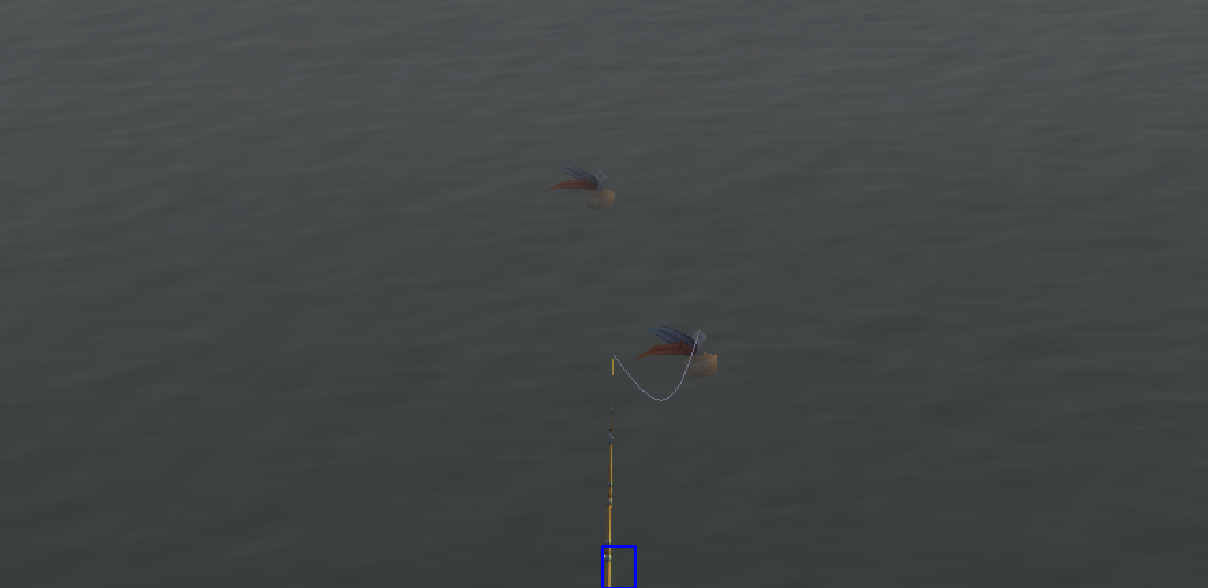

In [137]:
converted = cv.cvtColor(screen_img, cv.COLOR_BGR2RGB)
display(Image.fromarray(converted))